In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import scipy.spatial

Make 50 random points with X and Y coordinates from 0 to 256.

In [2]:
pointCount = 50
points = np.random.rand(pointCount, 2) * 256
points[:3]

array([[  55.33711657,  242.6566911 ],
       [ 227.38286517,   96.21493063],
       [ 208.9344111 ,   72.63008352]])

Look at the last three points.

In [3]:
# Type your solution here and press CTRL-ENTER

Make a scatter plot of the 50 random points.

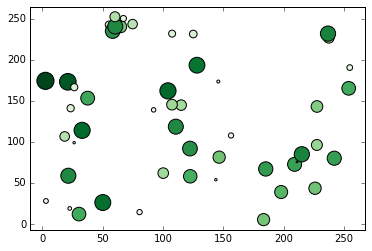

In [7]:
%matplotlib inline
values = np.random.rand(pointCount) * 300
plt.scatter(points[:, 0], points[:, 1], c=values, s=values, cmap=plt.cm.Greens)
plt.axis('tight');

Set points with an area greater than 50 to a different color using the Paired colormap.

In [8]:
# Type your solution here and press CTRL-ENTER

Paint a heatmap of the 50 random points.

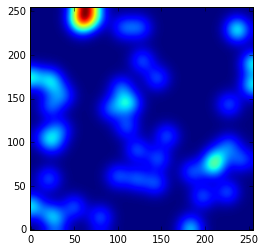

In [18]:
def get_heatmap(points):
    image = np.zeros((256, 256))
    for x, y in points:
        image[int(y), int(x)] += 1
    return scipy.ndimage.gaussian_filter(image, (10, 10))

plt.imshow(get_heatmap(points), origin='lower');

Overlay a scatter plot on the heatmap.

In [7]:
# Type your solution here and press CTRL-ENTER

Pick a random point.

In [20]:
import random
randomPoint = random.choice(points)
randomPoint

array([ 104.12426976,  162.14598317])

Get the five points closest to the random point.

In [21]:
import scipy.spatial
kdTree = scipy.spatial.KDTree(points)
neighborDistances, neighborIndices = kdTree.query(randomPoint, k=5)
points[neighborIndices]

array([[ 104.12426976,  162.14598317],
       [ 107.46918324,  145.35509125],
       [ 115.04888399,  144.78927053],
       [  92.26109817,  138.9926829 ],
       [ 128.1500044 ,  193.44639627]])

Generate fifty heatmaps where the first heatmap contains one random point and the third heatmap contains the random point and the two points closest to the random point.

In [10]:
import os
targetPath = os.path.expandvars('/tmp/points%s.png')
kdTree = scipy.spatial.KDTree(points)
image = get_heatmap([randomPoint])
pl.imsave(targetPath % 1, image, origin='lower')
for pointCount in xrange(2, len(points) + 1):
    nearestPoints = points[kdTree.query(randomPoint, k=pointCount - 1)[1]]
    image = get_heatmap(np.vstack([randomPoint, nearestPoints]))
    pl.imsave(targetPath % pointCount, image, origin='lower')

Combine the fifty heatmaps into an animated GIF.
    
    cd ~/Downloads/
    gm convert -delay 1 points*.png points.gif